##  Data visualization (distribution)
- The purpose is to learn about ways of visualizing distributions of data and ways of determining whether there are outliers inside data using ggplot

### Load libraries

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Configure defaults

In [2]:
options(repr.plot.width = 14, repr.plot.height = 6) # set plot size

### Read data

In [3]:
bankData <- read.csv('~/Downloads/bank-data.csv', sep = ';')
str(bankData)

'data.frame':	45211 obs. of  17 variables:
 $ age      : int  58 44 33 47 33 35 28 42 58 43 ...
 $ job      : chr  "management" "technician" "entrepreneur" "blue-collar" ...
 $ marital  : chr  "married" "single" "married" "married" ...
 $ education: chr  "tertiary" "secondary" "secondary" "unknown" ...
 $ default  : chr  "no" "no" "no" "no" ...
 $ balance  : int  2143 29 2 1506 1 231 447 2 121 593 ...
 $ housing  : chr  "yes" "yes" "yes" "yes" ...
 $ loan     : chr  "no" "no" "yes" "no" ...
 $ contact  : chr  "unknown" "unknown" "unknown" "unknown" ...
 $ day      : int  5 5 5 5 5 5 5 5 5 5 ...
 $ month    : chr  "may" "may" "may" "may" ...
 $ duration : int  261 151 76 92 198 139 217 380 50 55 ...
 $ campaign : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays    : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ previous : int  0 0 0 0 0 0 0 0 0 0 ...
 $ poutcome : chr  "unknown" "unknown" "unknown" "unknown" ...
 $ y        : chr  "no" "no" "no" "no" ...


### Frequency distribution

#### Univariate categorical variable
- Frequency table
    - What are the job distributions/proportions of our customers ?

In [4]:
bankData %>% group_by(job) %>% summarise(n = n()) %>% arrange(desc(n))

job,n
<chr>,<int>
blue-collar,9732
management,9458
technician,7597
admin.,5171
services,4154
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303


#### Univariate categorical variable 
- Bar chart (count plot)
    - What are the job distributions/proportions of our customers ?

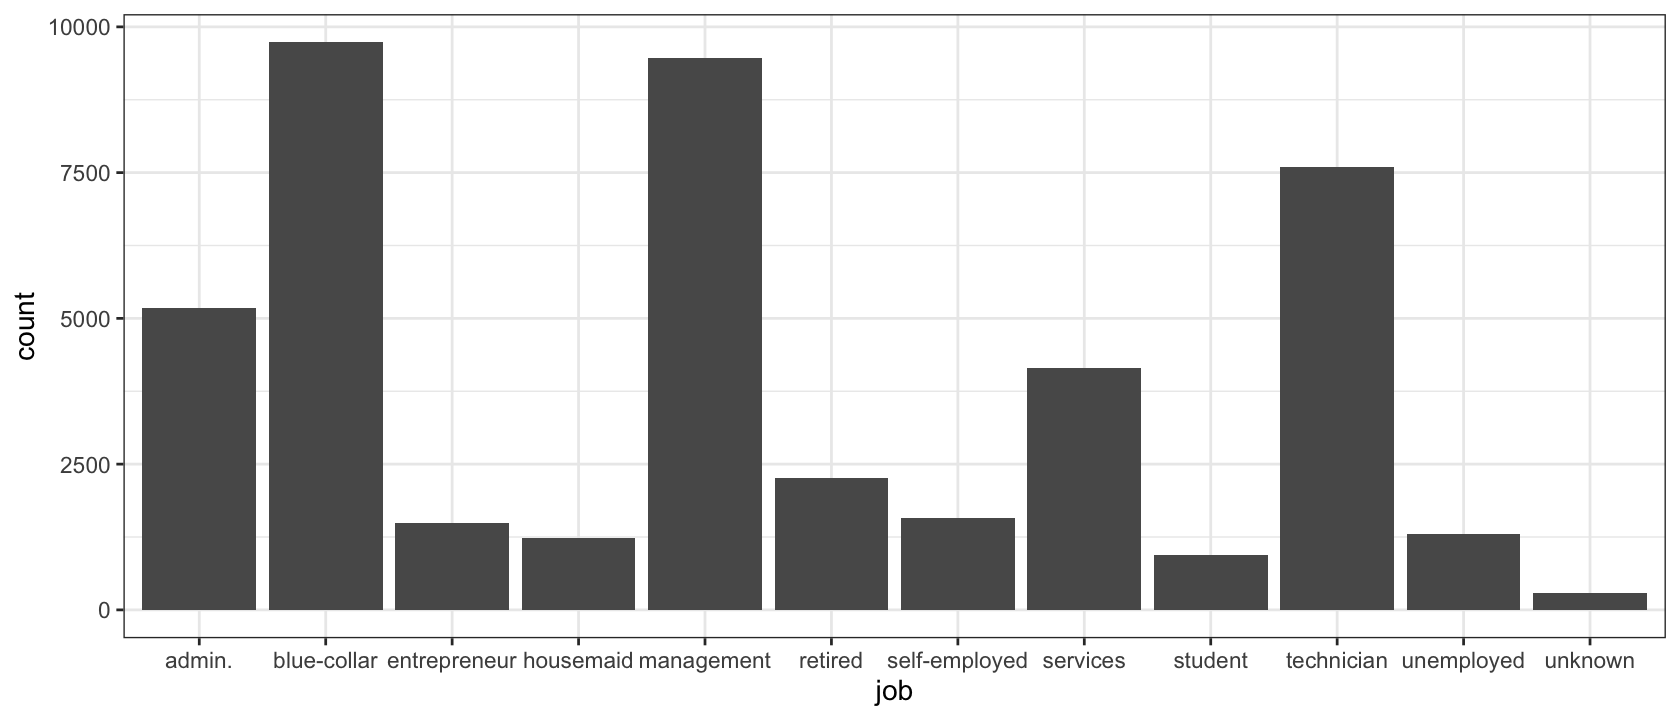

In [5]:
ggplot(data = bankData, mapping = aes(x = job)) + 
geom_bar() +
theme_bw(base_size = 17)

#### Bivariate categorical variables 
- Joint frequency (contingency) table
    - How many of our customers are married and graduate with tertiary levels ?

In [6]:
bankData %>% 
group_by(education, marital) %>% 
summarise(n = n()) %>% 
spread(key = marital, value = n)

`summarise()` has grouped output by 'education'. You can override using the `.groups` argument.


education,divorced,married,single
<chr>,<int>,<int>,<int>
primary,752,5246,853
secondary,2815,13770,6617
tertiary,1471,7038,4792
unknown,169,1160,528


#### Univariate quantitative variable
- Binned frequency table
 - What are the age group distributions of customers ?

In [7]:
brk <- c(0,20,30,40,50,60,100)
h <- hist(bankData$age, breaks = brk, plot=F)
freq_table <- data.frame(min_age = h$breaks[-length(brk)], max_age = h$breaks[-1], counts = h$counts)
freq_table

min_age,max_age,counts
<dbl>,<dbl>,<int>
0,20,97
20,30,6933
30,40,17687
40,50,11239
50,60,8067
60,100,1188


#### Univariate quantitative variable
- histogram
    - What is the distribution of age variable ?

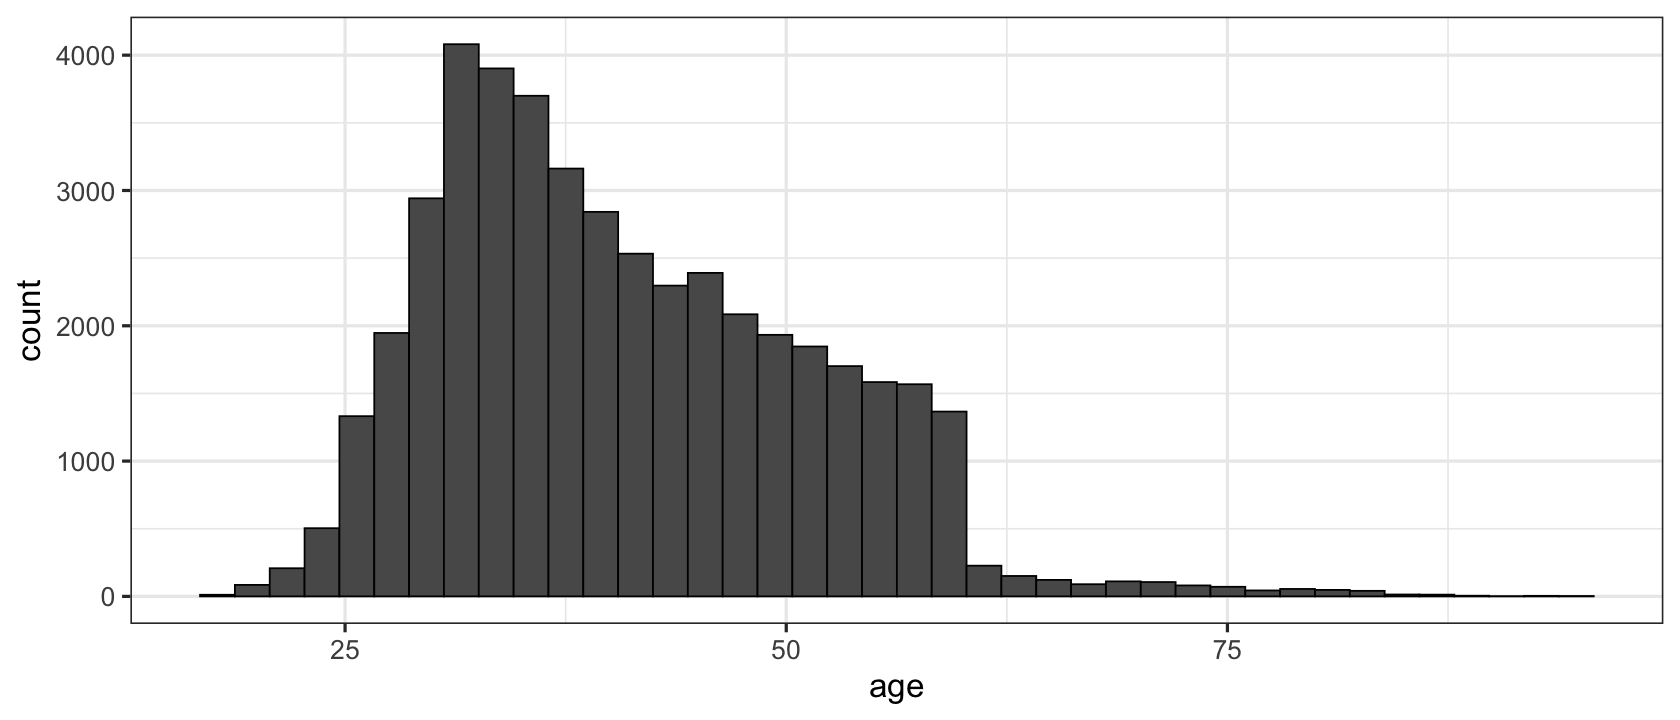

In [8]:
ggplot(data = bankData, mapping = aes(x = age)) +
geom_histogram(color = "black", bins = 40) +
theme_bw(base_size = 20)

### Detect outliers
- box plot

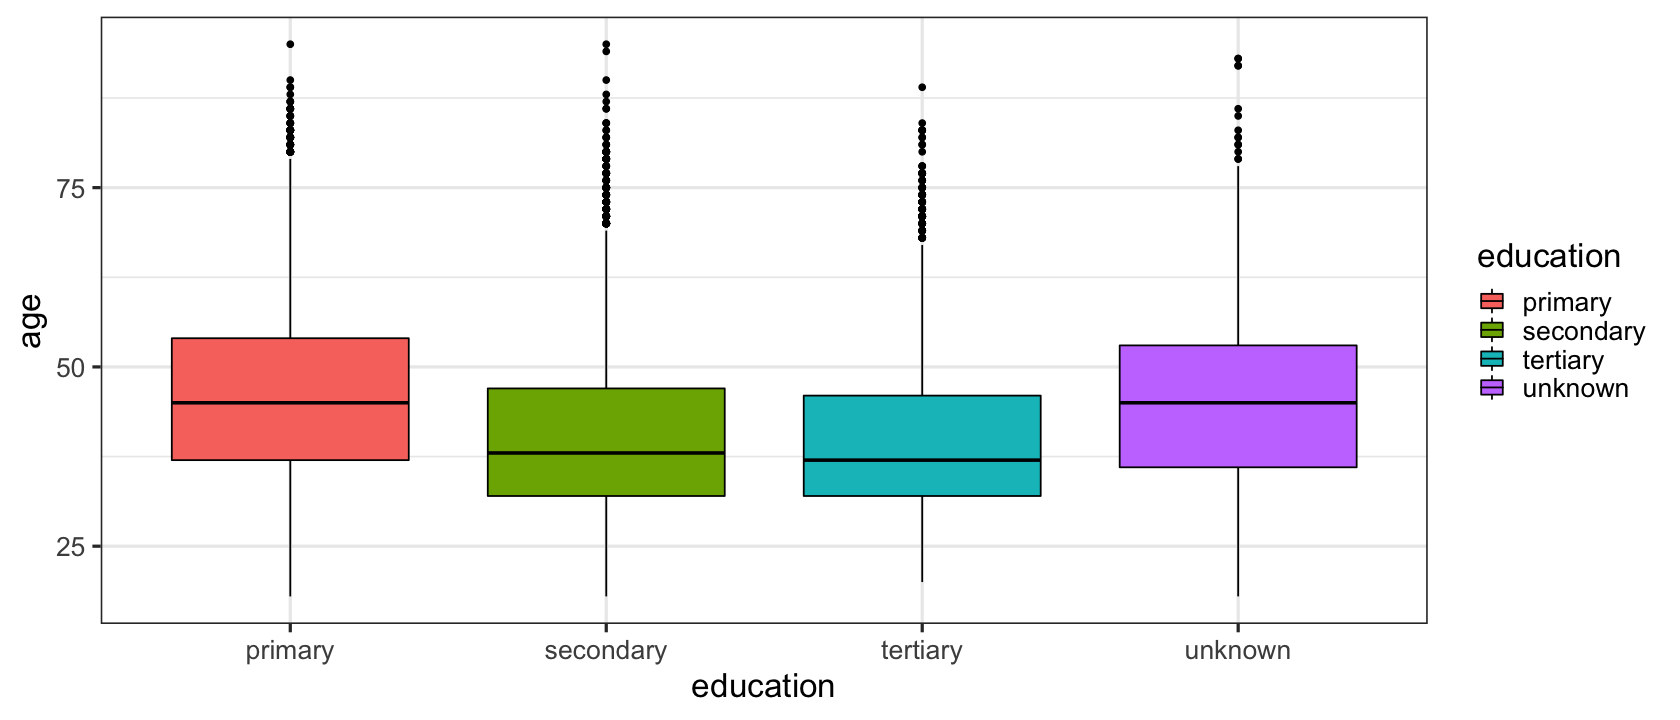

In [9]:
bankData %>%
ggplot(aes(x = education, y = age, fill = education)) +
geom_boxplot(color = 'black') +
theme_bw(base_size = 20)

- Quartile & IQR

In [10]:
bankData %>% 
group_by(education) %>%
summarise(
    min = min(balance),
    q1 = quantile(balance, 0.25),
    mean = mean(balance),
    median = median(balance),
    q3 = quantile(balance, 0.75),
    max = max(balance),
    iqr = IQR(balance)
)

education,min,q1,mean,median,q3,max,iqr
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
primary,-2604,61,1250.950,403,1390,71188,1329
secondary,-8019,55,1154.881,392,1234,81204,1179
tertiary,-6847,104,1758.416,577,1804,102127,1700
unknown,-1445,106,1526.754,568,1699,64343,1593
